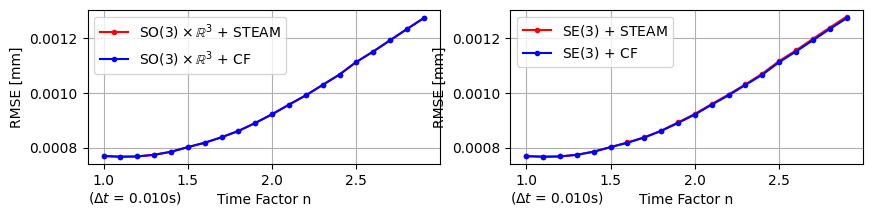

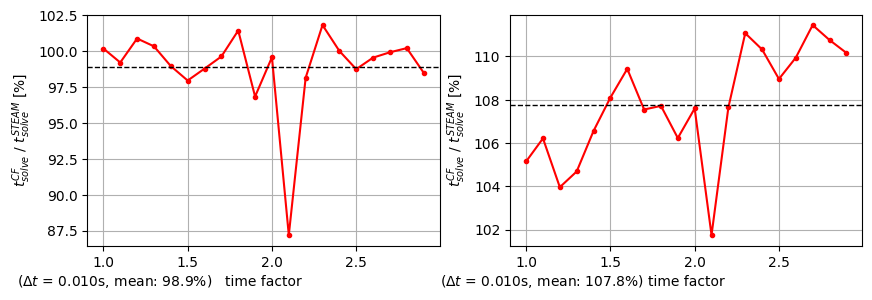

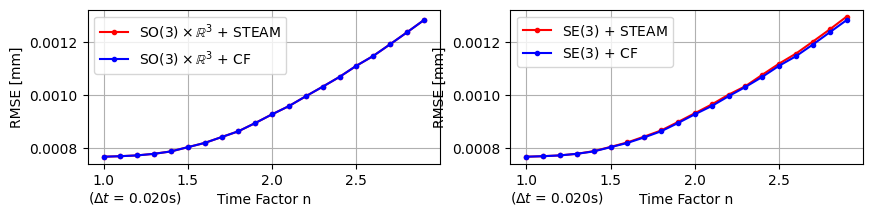

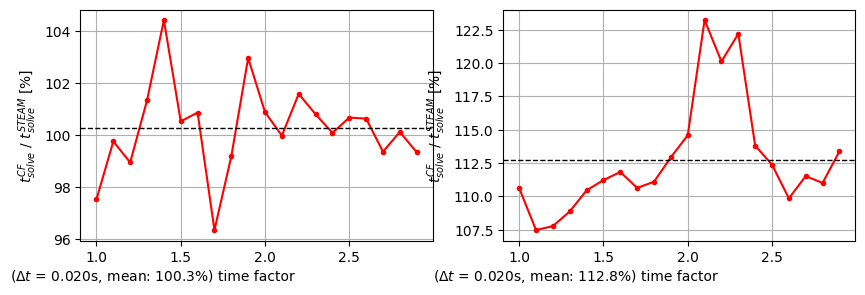

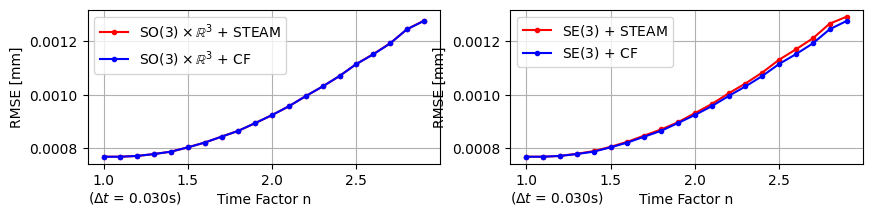

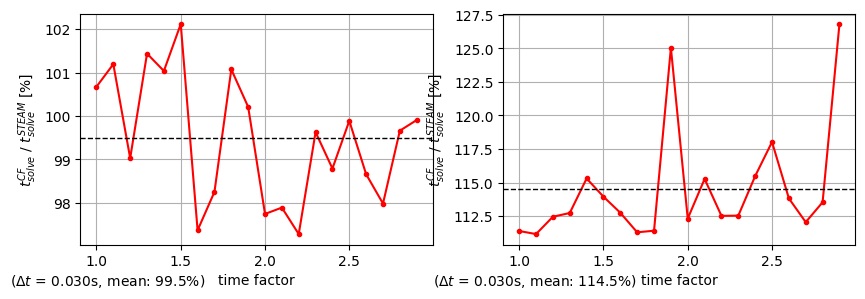

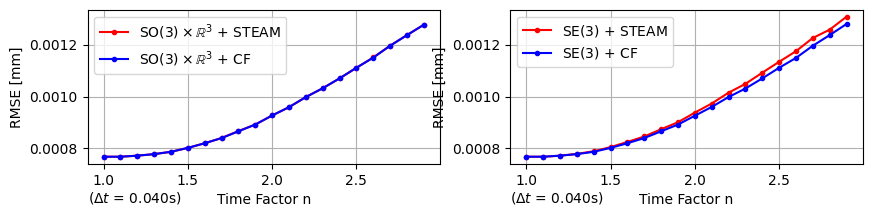

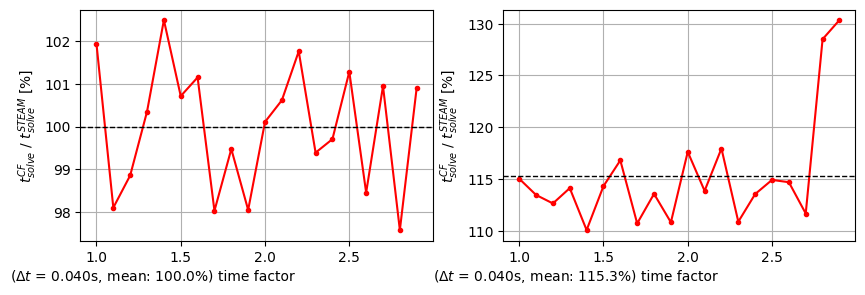

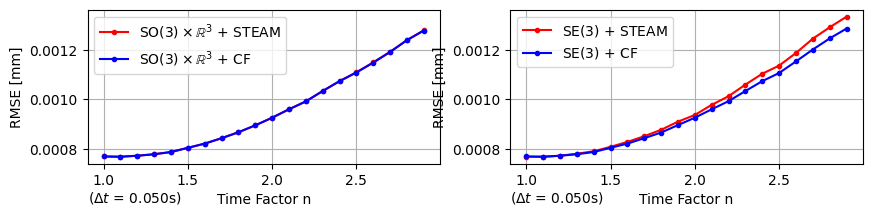

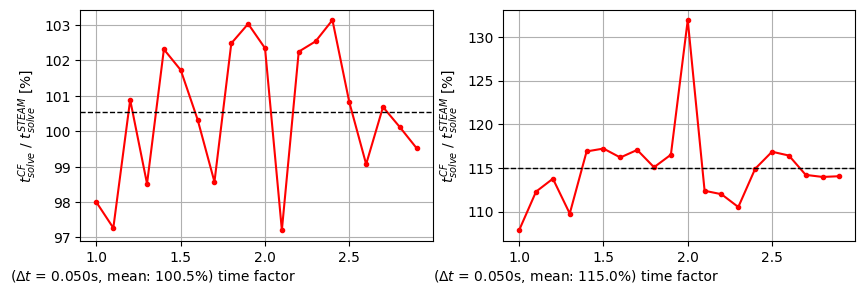

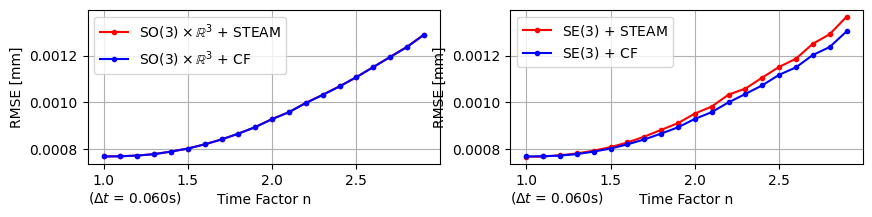

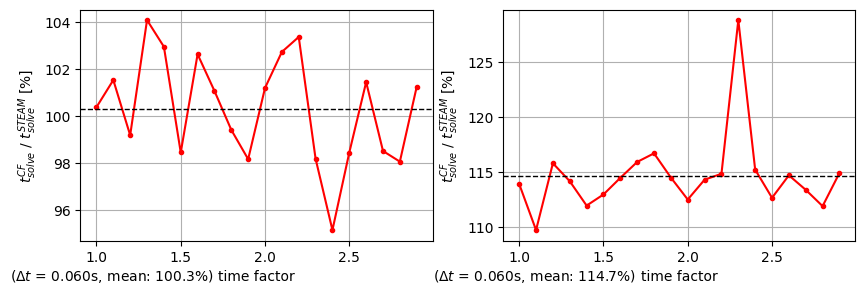

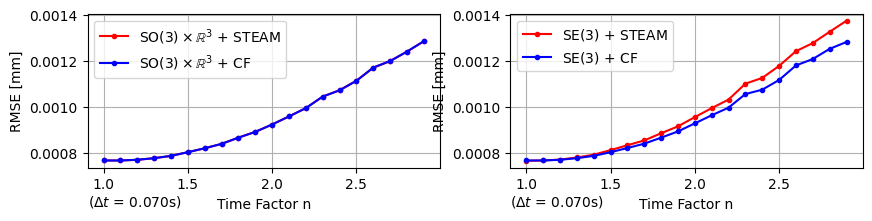

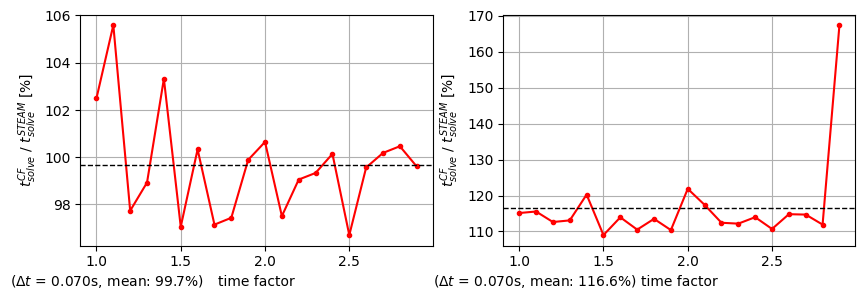

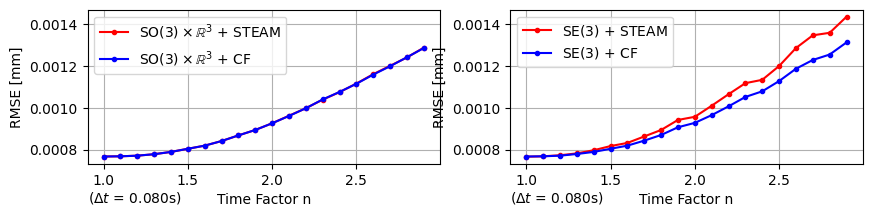

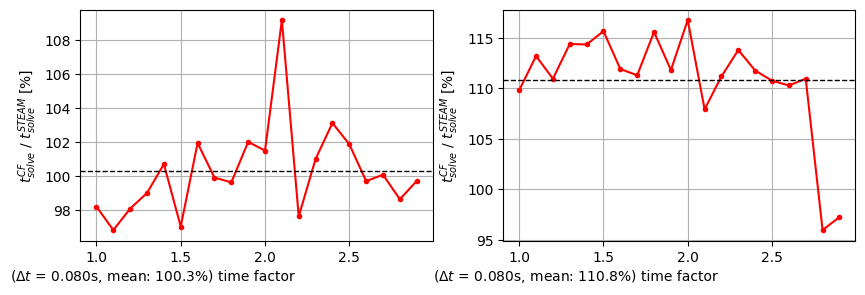

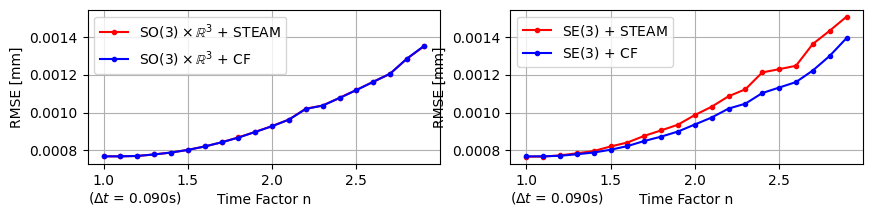

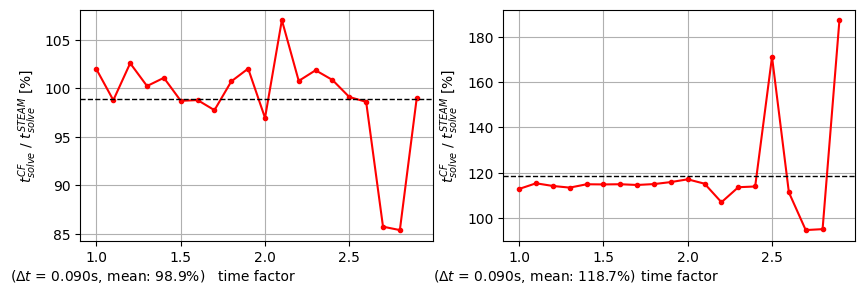

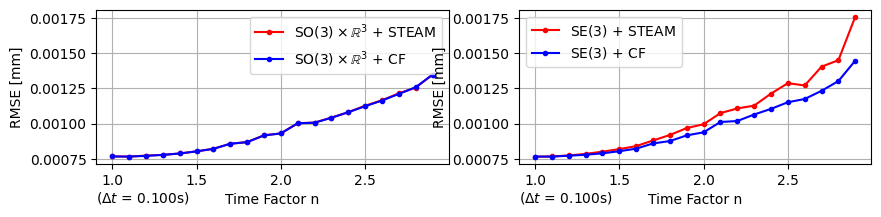

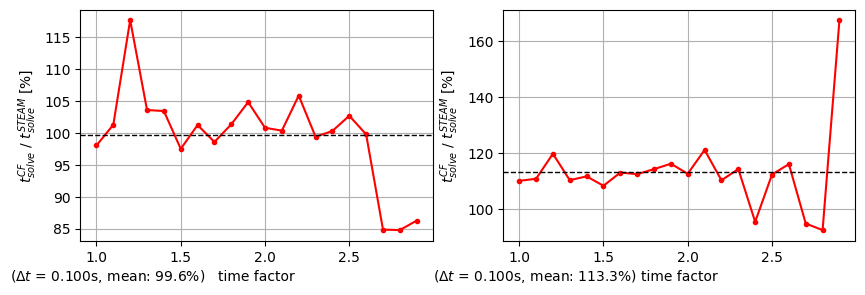

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

log_dir = '/media/tmn/mySataSSD1/Experiments/gptr_v2/logs/vicalib/'
df = pd.read_csv(log_dir + '/logvicalib_backup.csv')
# df = pd.read_csv(log_dir + '/vicalib.csv')

df.sort_values(by=['tskew', 'dt'], inplace=True)

# dt0 = 0.01
df['m'] = df['dt']
df['n'] = df['tskew']
df['so3xr3_diff'] = df.apply(lambda x : x['so3xr3ap_rmse'] - x['so3xr3cf_rmse'], axis=1)
df['se3_diff'] = df.apply(lambda x : x['se3ap_rmse'] - x['se3cf_rmse'], axis=1)

ns = sorted(list(set(df['n'].tolist())))
ms = sorted(list(set(df['m'].tolist())))

def plotAPCF(ax, dftemp, poseres, m):
    poseresmath = r'$\mathrm{SO}(3)\times\mathbb{R}^3$' if poseres.lower() == 'so3xr3' else '$\mathrm{SE}(3)$'
    ax.plot(dftemp["n"], dftemp[f"{poseres.lower()}ap_rmse"], marker="o", markersize=3, linestyle="-", color='r', label=f"{poseresmath} + STEAM")
    ax.plot(dftemp["n"], dftemp[f"{poseres.lower()}cf_rmse"], marker="o", markersize=3, linestyle="-", color='b', label=f"{poseresmath} + CF")
    ax.grid('on')
    ax.set_xlabel('Time Factor n')
    ax.set_ylabel('RMSE [mm]')
    ax.legend()
    
def plotAPCFTslv(ax, dftemp, poseres, m):
    
    dftemp_ = dftemp.copy()
    dftemp_['tslv_ratio'] = dftemp_.apply(lambda x: x[f"{poseres.lower()}cf_tslv"]/ x[f"{poseres.lower()}ap_tslv"] * 100, axis=1)
    ax.plot(dftemp_["n"], dftemp_['tslv_ratio'], marker=".", linestyle="-", color='r')
    
    mean = dftemp_['tslv_ratio'].mean()
    ax.axhline(y=mean, color="black", linestyle="--", linewidth=1)
    
    # ax.text(0.95, ax.get_ylim()[-1]*0.05 + ax.get_ylim()[0]*0.95, f'mean: {mean:.1f}%\n $\Delta t$ = {m:.3f}s \n')    
    ax.grid('on')
    ax.set_xlabel('time factor')
    ax.set_ylabel(r'$t_{solve}^{CF}$ / $t_{solve}^{STEAM}$ [%]')
    # ax.legend()
    
    return mean

for m in ms:
    
    # if m not in [0.05, 0.1]:
    #     continue
       
    dftemp = df[(df['m'] == m) ]
    fig, ax = plt.subplots(1, 2, figsize=(10, 2))
    plotAPCF(ax[0], dftemp, 'SO3xR3', m)
    plotAPCF(ax[1], dftemp, 'SE3', m)
    
    ylims = ax[0].get_ylim() + ax[1].get_ylim()
    ymin, ymax = min(ylims), max(ylims)
    
    ax[0].set_ylim([ymin, ymax])
    ax[1].set_ylim([ymin, ymax])
    
    ymean = ymin + (ymax - ymin)*0.45
    ax[0].text(0, -0.25,  f'($\Delta t$ = {m:.3f}s)', transform=ax[0].transAxes)
    ax[1].text(0, -0.25,  f'($\Delta t$ = {m:.3f}s)', transform=ax[1].transAxes)
    
    # ax[0].set_xticks(np.arange(1, 25, 5))
    # ax[1].set_xticks(np.arange(1, 25, 5))
    
    plt.show()
    
    # fig.tight_layout()
    fig.savefig(log_dir + f'vi_so3xr3_dt_{int(m*1000):03d}.jpg', bbox_inches='tight', dpi=300)
    
    # Plot the computational time
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    mean0 = plotAPCFTslv(ax[0], dftemp, 'SO3xR3', m)
    mean1 = plotAPCFTslv(ax[1], dftemp, 'SE3', m)
     
    ax[0].text(-0.2, -0.175, f'($\Delta t$ = {m:.3f}s, mean: {mean0:.1f}%)', transform=ax[0].transAxes)
    ax[1].text(-0.2, -0.175, f'($\Delta t$ = {m:.3f}s, mean: {mean1:.1f}%)', transform=ax[1].transAxes)
    
    # fig.tight_layout()
    fig.savefig(log_dir + f'vi_so3xr3_tslv_dt_{int(m*1000):03d}.jpg', bbox_inches='tight', dpi=300)
